# Problem Statement:


X-Education is an education company sells online Education courses to professionals and does its marketing through many online advertisements. Company gets information through different channels and if candidates enquring with certain education level it calls lead. Typically lead conversion is 30% of certain education. Company identifying Hot Leads on certain criteria also. Lead conversion ratio is lesser than number of enrollment. comapny given Target to achieve 80% of total enrollment


# Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Step 1:  Reading and Understanding Data

In [133]:
# Importing required libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profile

%matplotlib inline
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Load the  dataset

leaddf = pd.read_csv('Leads.csv', encoding = 'latin')
leaddf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [135]:
# inspect leaddf dataframe

print("*********************************  Info *******************************************") 
print(leaddf.info())
print("*********************************  Shape ******************************************") 
print(leaddf.shape)
print("**************************** Columns having null values *****************************")
print(leaddf.isnull().any())
print("**************************** Describe *****************************")
leaddf.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [136]:
leaddf.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
these columns while entering the data.

Specialization
How did you hear about X Education
Lead Profile
City

In [137]:
# Update 'Select' values to NaN.

leaddf['Specialization'] = leaddf['Specialization'].replace('Select', np.nan)
leaddf['How did you hear about X Education'] = leaddf['How did you hear about X Education'].replace('Select', np.nan)
leaddf['Lead Profile'] = leaddf['Lead Profile'].replace('Select', np.nan)
leaddf['City'] = leaddf['City'].replace('Select', np.nan)

### Check for the null values

In [138]:
percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Listing the columns having more than 30 % of Null values

In [139]:
colswithhigerNullvalues=leaddf.columns[100*(leaddf.isnull().sum()/len(leaddf.index))>30]
print(colswithhigerNullvalues)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


#### Dropping all the columns with null values percentage greater than 30%

In [140]:
leaddf1 = leaddf.drop(colswithhigerNullvalues, axis=1).copy()


In [141]:
round(100*(leaddf1.isnull().sum()/len(leaddf1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [142]:
# Treating the columns with null values less than 30%

remaining_missing = leaddf1.columns[(100*(leaddf1.isnull().sum()/len(leaddf1)) < 30) & (100*(leaddf1.isnull().sum()/len(leaddf1)) >0) ]
print(remaining_missing)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


In [143]:
# Checking value counts of 'What is your current occupation' variable:-

leaddf1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

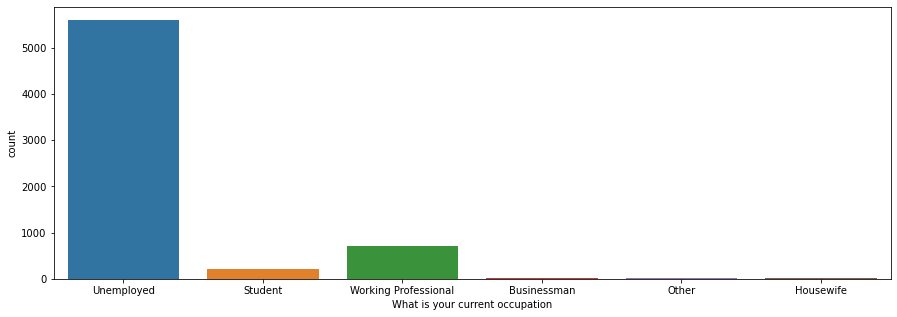

In [144]:

plt.figure(figsize=(15,5))
sns.countplot(leaddf1['What is your current occupation'])
plt.show()

As we see that for 'What is your current occupation'  count of 'Unemployed' is highest but we will impute missing values with 'Other' considering 
we do not know current occupation of lead.So we will create a separate category called 'Other'.

In [145]:
leaddf1['What is your current occupation'].fillna('Other',inplace=True)

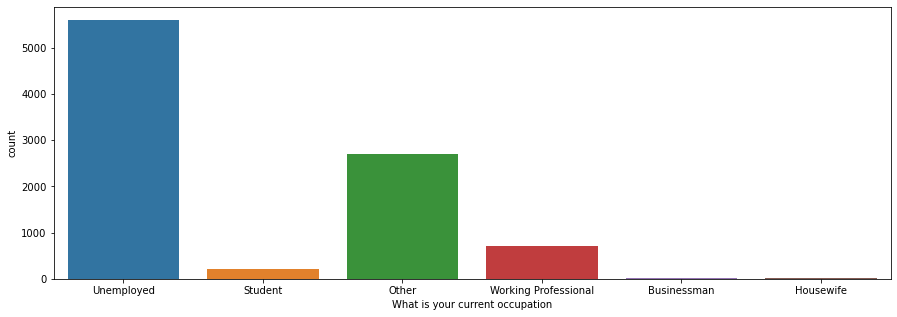

In [146]:

plt.figure(figsize=(15,5))
sns.countplot(leaddf1['What is your current occupation'])
plt.show()

In [147]:
# Checking value count of 'What matters most to you in choosing a course' variable:-

leaddf1['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

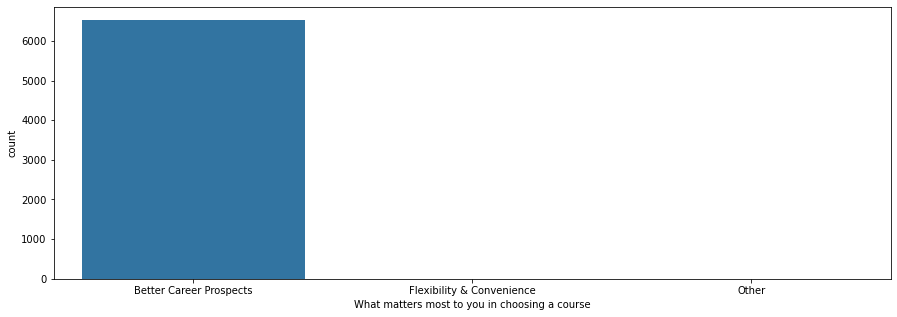

In [148]:

plt.figure(figsize=(15,5))
sns.countplot(leaddf1['What matters most to you in choosing a course'])
plt.show()

 Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
 since the column also has around 29% as missing values, we shall go ahead and drop the column


In [149]:

leaddf1 = leaddf1.drop(['What matters most to you in choosing a course'], axis=1)

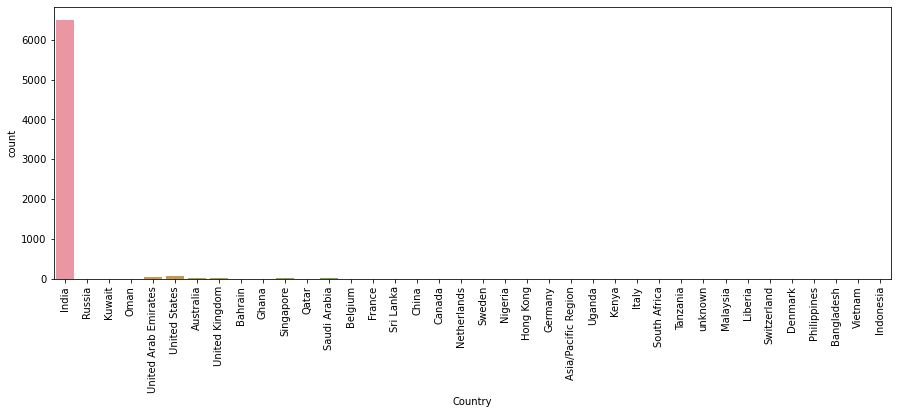

In [150]:
# Plotting count plot to visualize counts of data of 'Country' column:-

plt.figure(figsize=(15,5))
sns.countplot(leaddf1['Country'])
plt.xticks(rotation=90)
plt.show()

Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
 we shall go ahead and drop the column

In [151]:

leaddf1 = leaddf1.drop(['Country'], axis=1)

In [152]:
# Null value treatment for 'Lead Source'

leaddf1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

As noticed from the above value counts list there are two vlaues for Google and google.So lets fix this

In [153]:
leaddf1['Lead Source']=leaddf1['Lead Source'].replace('google','Google')

As Google is has the highest value count, lets replace the null values with 'Goole'

In [154]:
leaddf1['Lead Source'].fillna('Google',inplace=True)

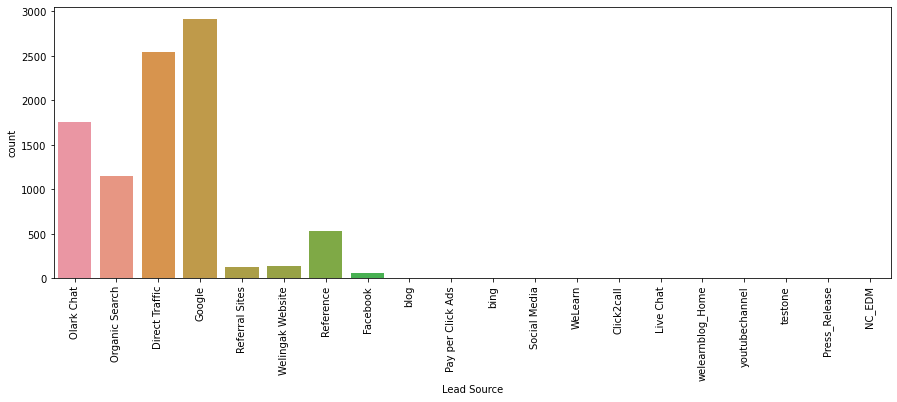

In [155]:
plt.figure(figsize=(15,5))
sns.countplot(leaddf1['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [156]:
round(100*(leaddf1.isnull().sum()/len(leaddf1)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [157]:
# Check the value counts for the column Total Visits

leaddf1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Replace the null values of Total visits with median

In [158]:
leaddf1['TotalVisits'] = leaddf1['TotalVisits'].replace(np.nan, leaddf1['TotalVisits'].median())


In [159]:

# Check the value counts for Page Views Per Visit

leaddf1['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

Replace the null values of 'Page Views Per Visit' with median

In [160]:
leaddf1['Page Views Per Visit'] = leaddf1['Page Views Per Visit'].replace(np.nan, leaddf1['Page Views Per Visit'].median())

In [161]:
# Check the value counts for the column Last Activity

leaddf1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

As we do not have any information of what the last activity of the customer would have been, we can add a new category 
 called 'Other' for the null values

In [162]:
leaddf1['Last Activity'].fillna("Other",inplace=True)

In [163]:
round(100*(leaddf1.isnull().sum()/len(leaddf1)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

Now we see that there are no columns with null values, so we are good to go with futher data validations

When we see that Prospect ID and Lead Number have unique Id and will not make any significant impact on our model.So we can drop it.

In [164]:
leaddf1 = leaddf1.drop(['Lead Number'], axis=1)
leaddf1 = leaddf1.drop(['Prospect ID'], axis=1)

In [165]:
leaddf1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [166]:
for i in list(leaddf1.iloc[:,:]):
    print("Value counts of ",{i})
    print(leaddf1[i].value_counts())
    print("*******")

Value counts of  {'Lead Origin'}
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
*******
Value counts of  {'Lead Source'}
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64
*******
Value counts of  {'Do Not Email'}
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*******
Value counts of  {'Do Not Call'}
No     9238
Yes       2
Name: Do Not Call,

Since the following columns have only one value "No" in all the rows, we can eliminate the columns : Magazine Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content I agree to pay the amount through cheque

In [167]:
leaddf1 = leaddf1.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

### Outlier treatment:

Check the outliers at 25%,50%,75%,90%,95% and above

In [168]:
leaddf1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


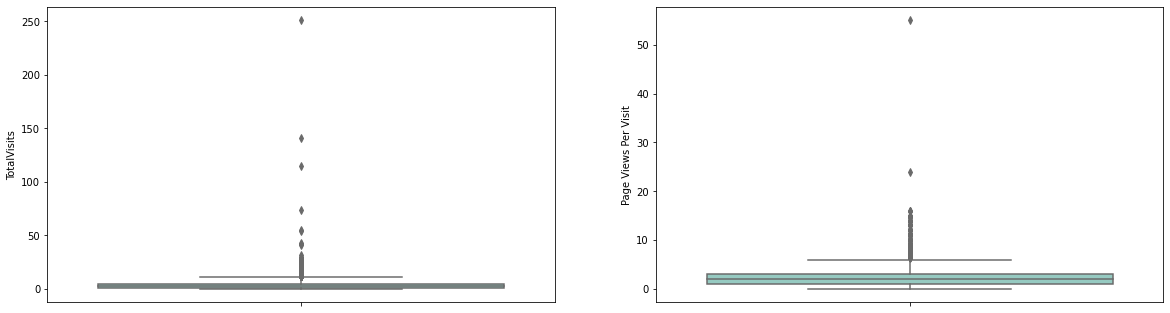

In [171]:
plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leaddf1)

plt.subplot(4,2,2)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leaddf1)
plt.show()

From the above percentiles we can see that outliers present in Total Visits and Page views per visit

Remove the outliers beyond 99% for both Total visits and Page Views Per Visit

In [173]:
high_quartile_page_visits = leaddf1['Page Views Per Visit'].quantile(0.99)
leaddf1 = leaddf1[leaddf1["Page Views Per Visit"] < high_quartile_page_visits]
high_quartile_total_visits = leaddf1['TotalVisits'].quantile(0.99)
leaddf1 = leaddf1[leaddf1["TotalVisits"] < high_quartile_total_visits]
leaddf1["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])


count    8679.000000
mean        2.075404
std         1.640965
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         4.000000
95%         5.000000
99%         6.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

In [174]:
leaddf1["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8679.000000
mean        2.813688
std         2.416376
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
90%         6.000000
95%         7.000000
99%        10.000000
max        11.000000
Name: TotalVisits, dtype: float64

## EDA on Lead Data 

#### Univariate Analysis

Checking the distribution of Converted (Target) column

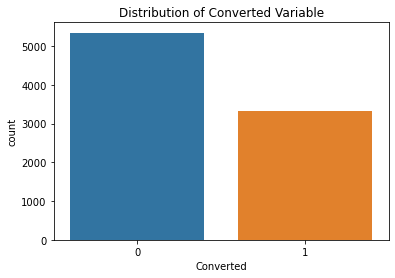

In [175]:
sns.countplot(leaddf1.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [210]:
def categoricalVsTarget(colName):
    plot = sns.catplot(x=colName, hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.5);
    plt.title(f'{colName} Vs Converted', fontsize = 14)
    plt.xlabel(colName, fontsize = 12)
    plt.ylabel("Count", fontsize = 12)
    plt.xticks(rotation=90)
    # Print the counts
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
        if np.isnan(p.get_height()):
            height = 0
            
        else:
            height = p.get_height()
        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    plt.show()

In [213]:
catCols=["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","What is your current occupation",
        "Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
        "A free copy of Mastering The Interview","Last Notable Activity"]

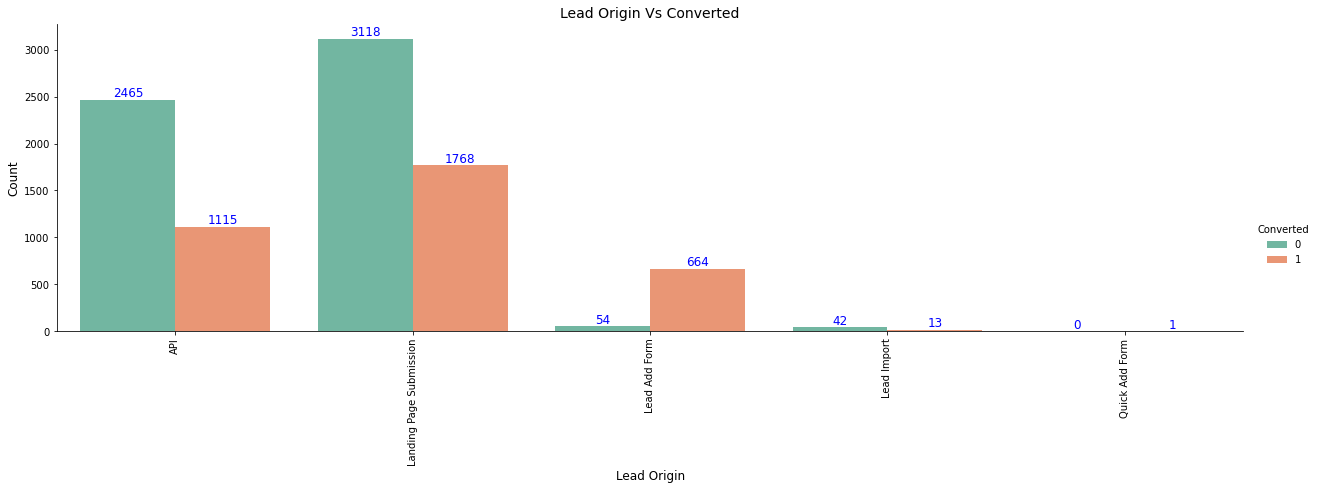

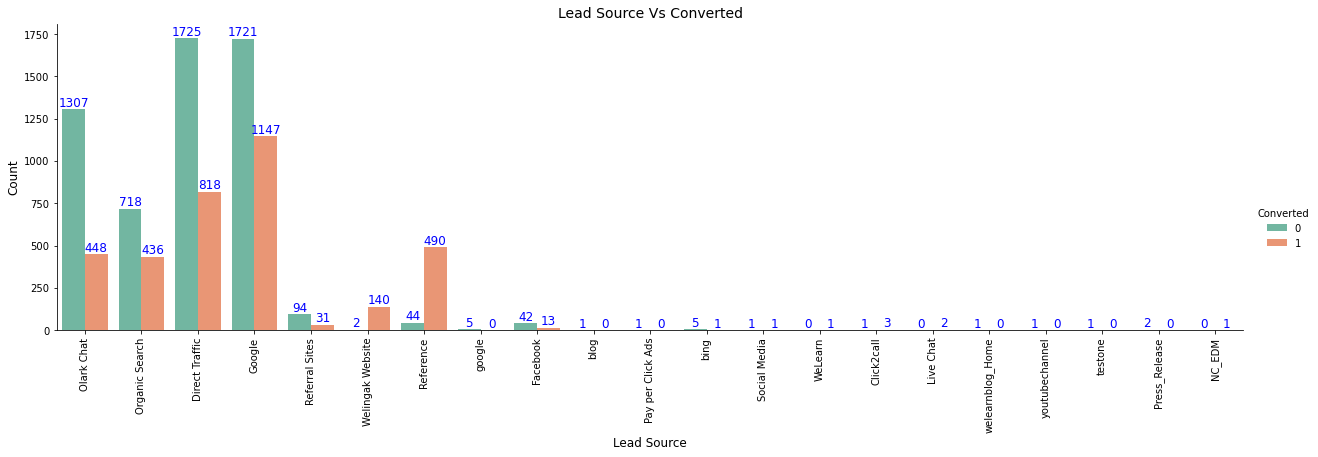

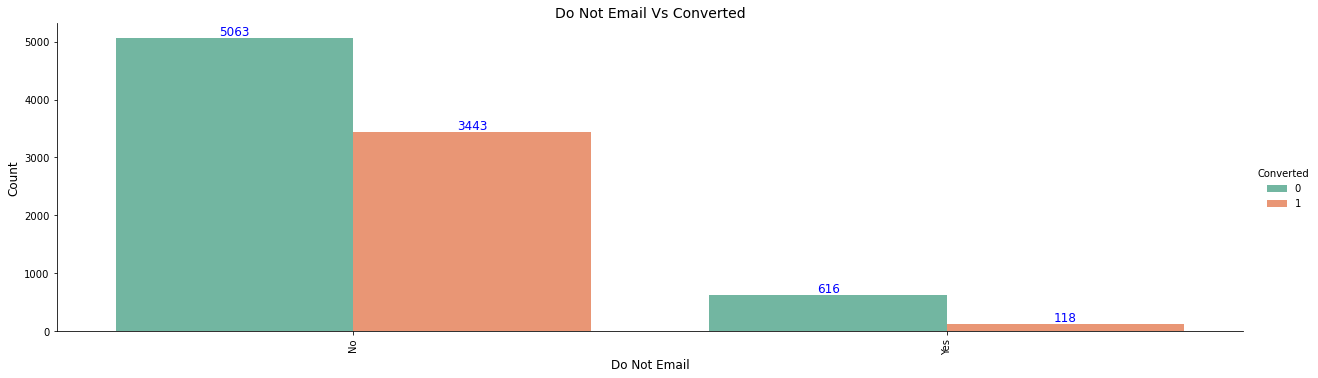

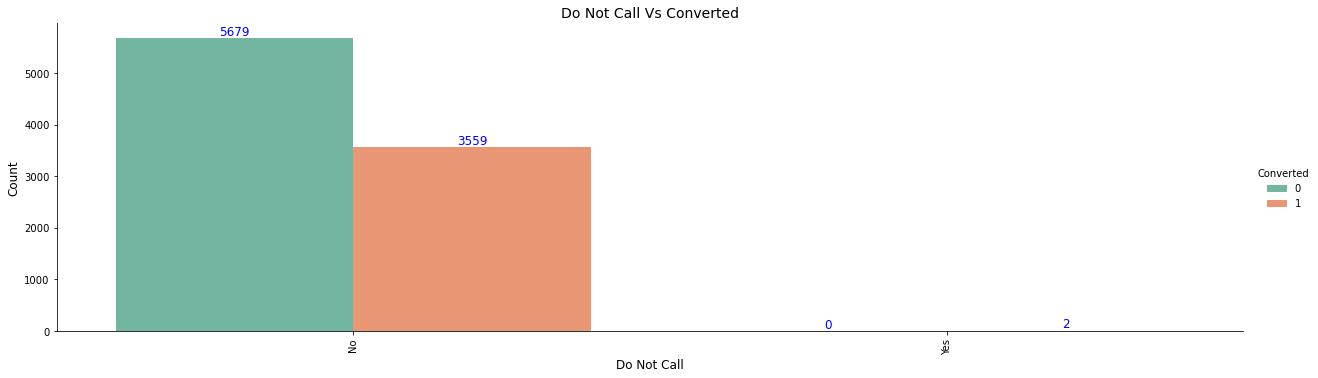

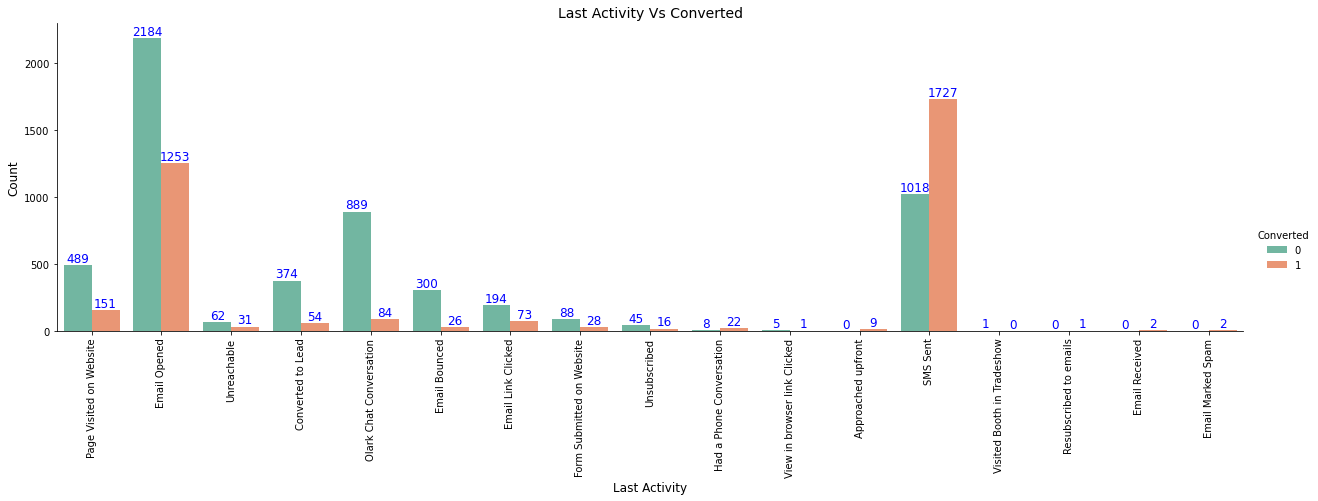

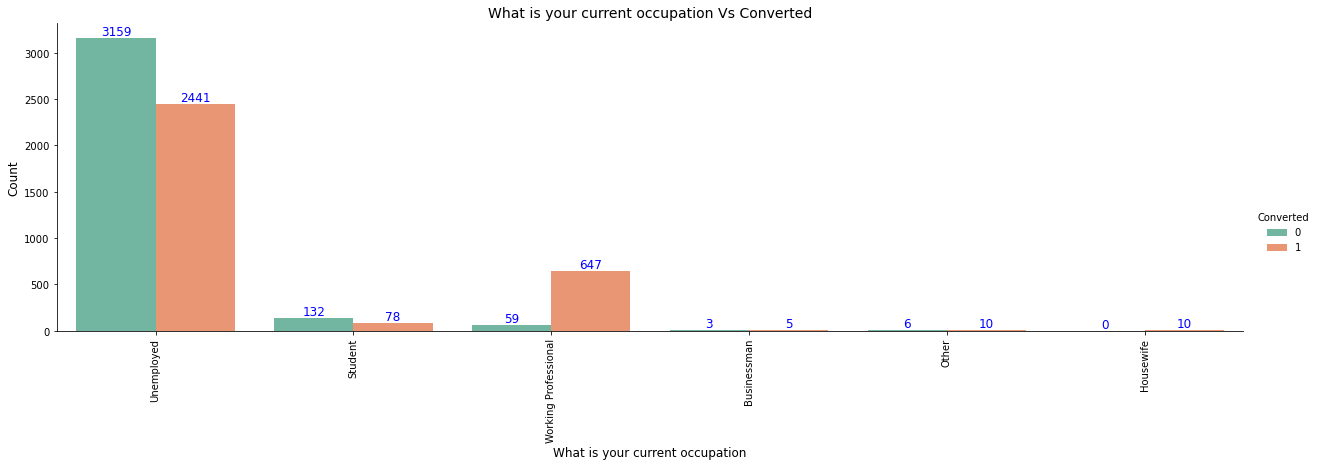

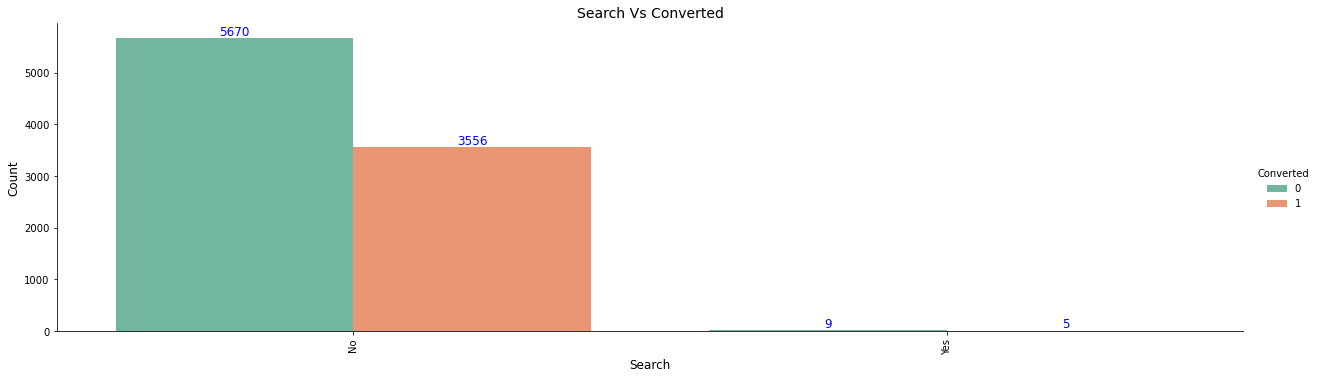

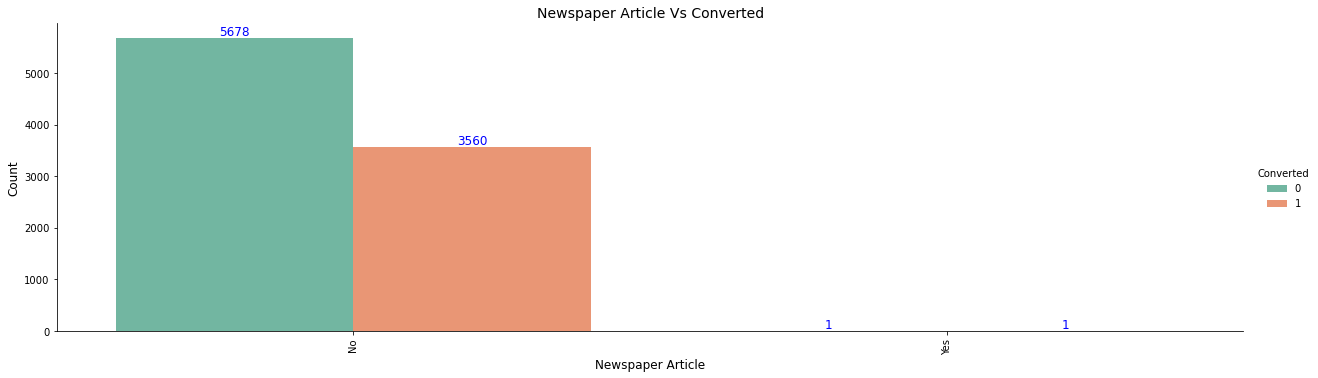

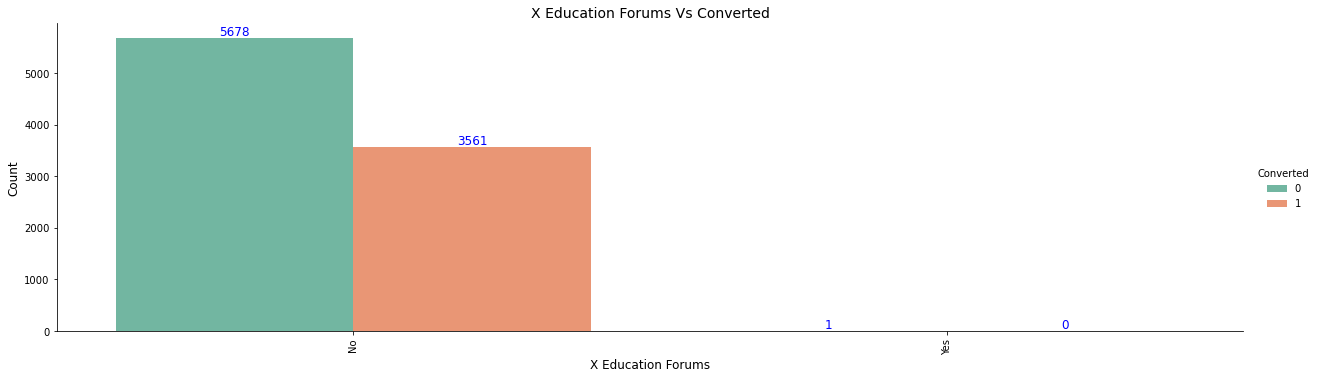

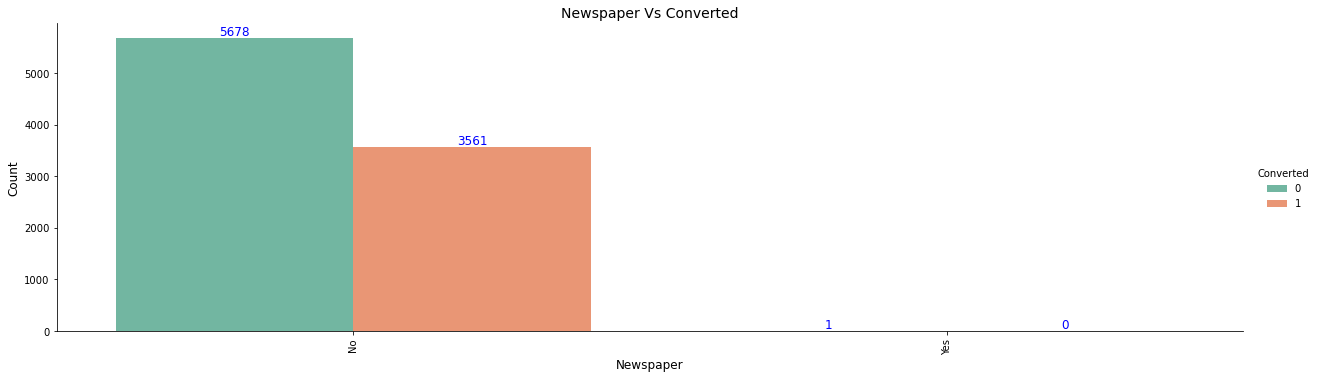

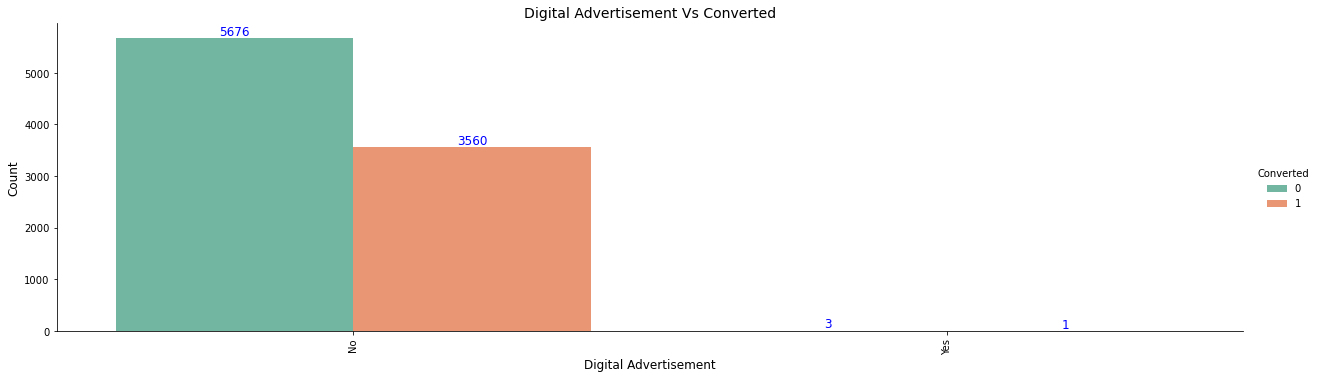

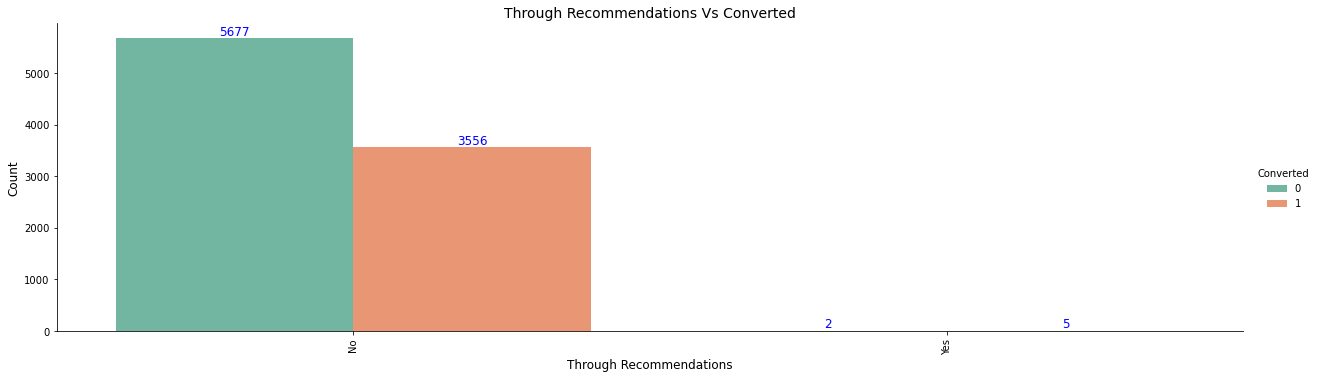

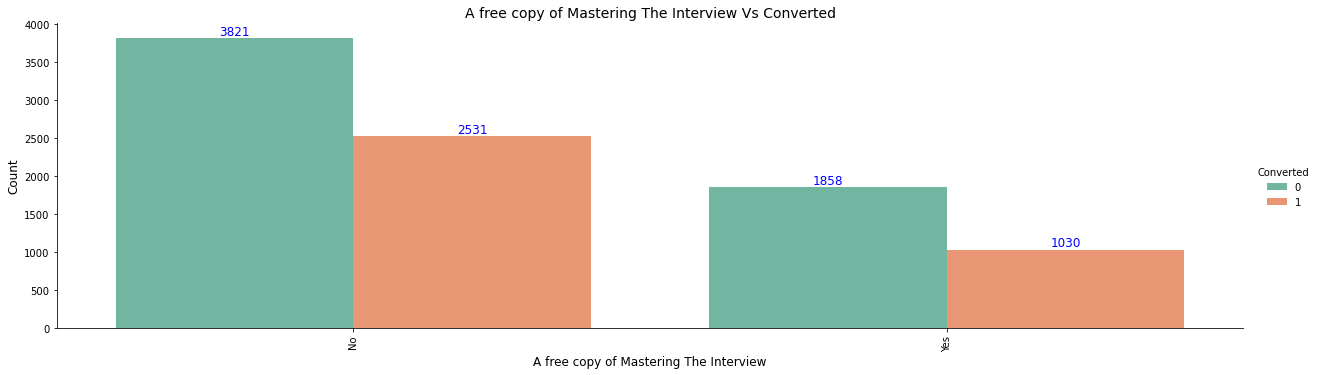

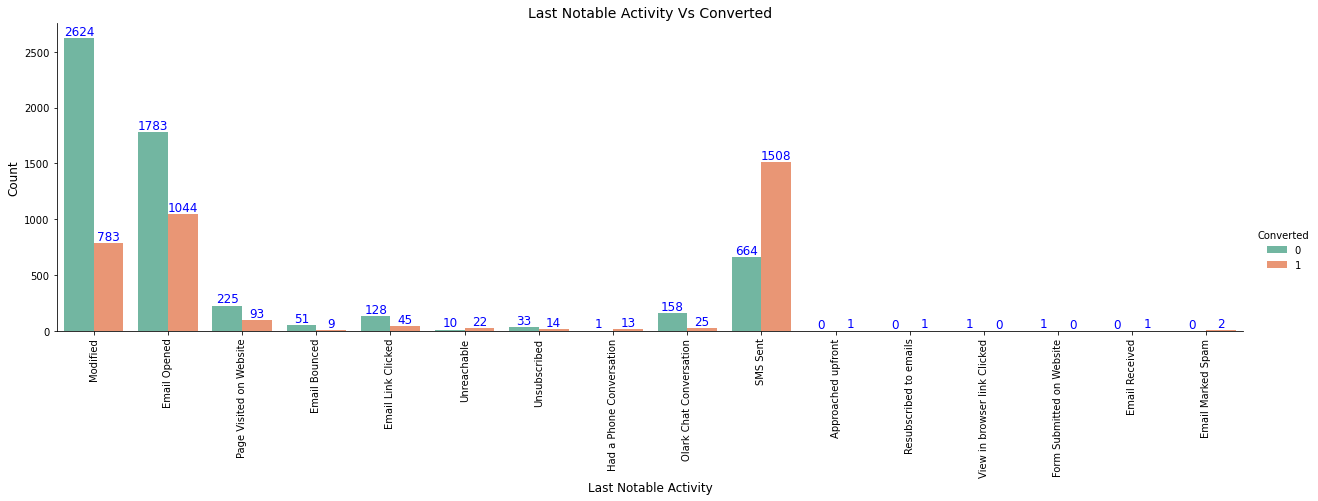

In [214]:
for col in catCols:
    categoricalVsTarget(col)

### Observations:

1.Maximum conversion happened from Landing Page Submission
2.Major conversion in the lead source is from google
3.Major conversion has happend from the emails that have been sent
4.Major conversions happened when calls were made.
5.Huge number of convertions happened with Email Opened last activity, but the conversion rate is high for SMS Sent
6.More conversion happend with people who are unemployed
7.Conversion rate is high on leads who are not through search
8.As "Newspaper Article" ,"X Education Forums" columns now has only one value for all rows - "No" , it is safe to drop this column
9.As Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column
10.


In [216]:
leaddf1 = leaddf1.drop(['Newspaper','X Education Forums','Newspaper Article'], axis=1)


### Continous Columns Vs Converted(Target Variable)

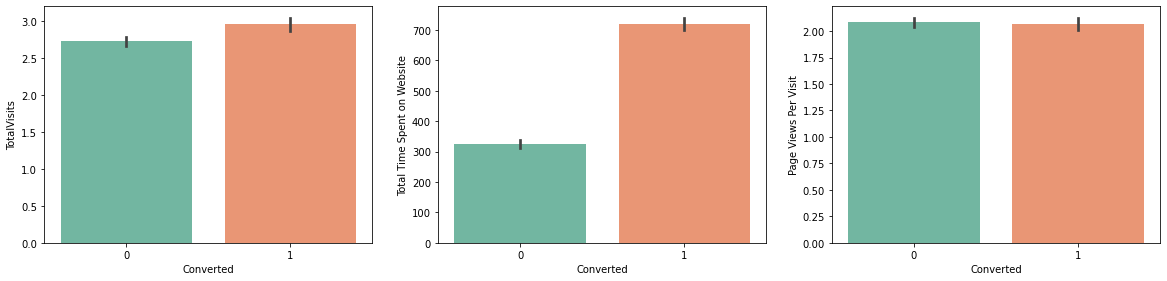

In [217]:

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leaddf1)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leaddf1)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leaddf1)
plt.show()

### Dummy Value creation

##### Converting some binary variables (Yes/No) to 0/1

In [219]:
bincols =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leaddf1[bincols] = leaddf1[bincols].apply(binary_map)

##### For categorical variables with multiple levels, create dummy features 

In [221]:
# Lead Origin : 

dummy_lead_origin = pd.get_dummies(leaddf1['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
dummy_lead_origin1 = dummy_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leaddf1 = pd.concat([leaddf1, dummy_lead_origin1], axis = 1)

# Lead Source :

dummy_lead_source = pd.get_dummies(leaddf1['Lead Source'], prefix='LeadSource')
# Dropping blog column
dummy_lead_source1 = dummy_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leaddf1 = pd.concat([leaddf1,dummy_lead_source1], axis=1)

# last Activity

dummy_last_activity = pd.get_dummies(leaddf1['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
dummy_last_activity1 = dummy_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leaddf1 = pd.concat([leaddf1,dummy_last_activity1], axis=1)

# What is your current occupation

dummy_curr_occupation = pd.get_dummies(leaddf1['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
dummy_curr_occupation1 = dummy_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leaddf1 = pd.concat([leaddf1,dummy_curr_occupation1], axis=1)

# Last Notable Activity

dummy_last_notable_activity = pd.get_dummies(leaddf1['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
dummy_last_notable_activity1 = dummy_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leaddf1 = pd.concat([leaddf1,dummy_last_notable_activity], axis=1)

leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


As we have created the dummy values for 
1) Lead Origin
2) Lead Source
3) Last Activity
4) What is your current occupation
5) Last Notable Activity

We can drop all these columns

In [224]:
leaddf1=leaddf1.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

## Test Train Split 

In [225]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = leaddf1.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [226]:
# Putting response variable to y

y = leaddf1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [227]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Scalaing 

In [228]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
4901,0,0,-0.338553,0.385078,-0.659267,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6624,0,0,0.078038,1.088861,-0.351473,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
762,0,0,-1.171733,-0.875184,-1.274855,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2007,0,0,-0.338553,0.157758,-0.043679,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3441,0,0,-1.171733,-0.875184,-1.274855,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [230]:
import statsmodels.api as sm

In [231]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6013
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 28 Nov 2023   Deviance:                   1.6892e+05
Time:                        15:37:13   Pearson chi2:                 8.26e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -2.349e+21   1.39e+14  -1.69e+07      0.000   -2.35e+21   -2.35e+21
Do Not Email                                     -3.757e+14   4.62e+06  -8.14e+07      0.000   -3.76e+14   -3.76e+14
Do Not Call                                       3.212e+15   4.76e+07   6.75e+07      0.000    3.21e+15    3.21e+15
TotalVisits                                       2.055e+14   1.41e+06   1.46e+08      0.000    2.05e+14    2.05e+14
Total Time Spent on Website                       3.097e+13   9.86e+05   3.14e+07      0.000     3.1e+13     3.1e+13
Page Views Per Visit                             -3.683e+14   1.37e+06  -2.69e+08      0.000   -3.68e+14   -3.68e+14
Search                                           -8.252e+14   2.75e+07     -3e+07      0.000   -8.25e+14   -8.25e+14
Digital Advertisement                             8.305e+14   4.76e+07   1.75e+07      0.000     8.3e+14     8.3e+14
Through Recommendations                           -4.63e+14   3.64e+07  -1.27e+07      0.000   -4.63e+14   -4.63e+14
A free copy of Mastering The Interview           -1.506e+14   2.71e+06  -5.56e+07      0.000   -1.51e+14   -1.51e+14
LeadOrigin_API                                       -1e+16   6.74e+07  -1.48e+08      0.000      -1e+16      -1e+16
LeadOrigin_Landing Page Submission               -9.967e+15   6.74e+07  -1.48e+08      0.000   -9.97e+15   -9.97e+15
LeadOrigin_Lead Add Form                         -1.025e+16   6.85e+07  -1.49e+08      0.000   -1.02e+16   -1.02e+16
LeadOrigin_Lead Import                           -1.054e+16   9.61e+07   -1.1e+08      0.000   -1.05e+16   -1.05e+16
LeadSource_Click2call                             1.139e+15   8.33e+07   1.37e+07      0.000    1.14e+15    1.14e+15
LeadSource_Direct Traffic                        -2.996e+14   6.73e+07  -4.45e+06      0.000      -3e+14      -3e+14
LeadSource_Facebook                              -2.932e+14   9.52e+07  -3.08e+06      0.000   -2.93e+14   -2.93e+14
LeadSource_Google                                -1.458e+14   6.72e+07  -2.17e+06      0.000   -1.46e+14   -1.46e+14
LeadSource_Live Chat                             -3.002e+14   8.32e+07  -3.61e+06      0.000      -3e+14      -3e+14
LeadSource_Olark Chat                             2.162e+14   6.73e+07   3.21e+06      0.000    2.16e+14    2.16e+14
LeadSource_Organic Search                        -1.173e+14   6.73e+07  -1.74e+06      0.000   -1.17e+14   -1.17e+14
LeadSource_Pay per Click Ads                     -1.801e+12   1.07e+05  -1.69e+07      0.000    -1.8e+12    -1.8e+12
LeadSource_Press_Release                         -4.265e+15   9.53e+07  -4.48e+07      0.000   -4.27e+15   -4.27e+15
LeadSource_Reference                     

## Feature seletion using RFE

In [232]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [233]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)


In [234]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False,  True, False, False])

In [235]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Search', False, 17),
 ('Digital Advertisement', False, 44),
 ('Through Recommendations', False, 26),
 ('A free copy of Mastering The Interview', False, 45),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 27),
 ('LeadSource_Click2call', False, 30),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Facebook', False, 3),
 ('LeadSource_Google', False, 14),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 12),
 ('LeadSource_Pay per Click Ads', False, 50),
 ('LeadSource_Press_Release', False, 43),
 ('LeadSource_Reference', False, 37),
 ('LeadSource_Referral Sites', False, 13),
 ('LeadSource_Social Media', False, 4),
 ('LeadSource_WeLearn', False, 47)

In [236]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Approached upfront', 'LastActivity_Email Opened',
       'LastActivity_Had a Phone Conversation', 'LastActivity_Other',
       'LastActivity_SMS Sent', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

### Model2

In [237]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6054
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.8
Date:                Tue, 28 Nov 2023   Deviance:                       4725.6
Time:                        15:39:56   Pearson chi2:                 6.32e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3820      0.527     -0.725      0.468      -1.414       0.650
Do Not Email                                    -1.1857      0.185     -6.418      0.000      -1.548      -0.824
Total Time Spent on Website                      1.1423      0.043     26.687      0.000       1.058       1.226
LeadOrigin_API                                  -0.5681      0.517     -1.099      0.272      -1.582       0.445
LeadOrigin_Landing Page Submission              -0.8451      0.513     -1.646      0.100      -1.851       0.161
LeadOrigin_Lead Add Form                         3.1495      0.539      5.846      0.000       2.094       4.205
LeadSource_Olark Chat                            1.1311      0.126      8.979      0.000       0.884       1.378
LeadSource_Welingak Website                     23.3653   2.01e+04      0.001      0.999   -3.93e+04    3.94e+04
LastActivity_Approached upfront                 26.0535    6.6e+04      0.000      1.000   -1.29e+05    1.29e+05
LastActivity_Email Opened                        1.0748      0.161      6.687      0.000       0.760       1.390
LastActivity_Had a Phone Conversation            0.7333      0.956      0.767      0.443      -1.140       2.607
LastActivity_Other                              -0.9519      0.466     -2.042      0.041      -1.866      -0.038
LastActivity_SMS Sent                            1.4758      0.120     12.266      0.000       1.240       1.712
CurrentOccupation_Housewife                     25.8587   8.08e+04      0.000      1.000   -1.58e+05    1.58e+05
CurrentOccupation_Other                         -1.1147      0.092    -12.150      0.000      -1.294      -0.935
CurrentOccupation_Working Professional           2.5041      0.189     13.252      0.000       2.134       2.874
LastNotableActivity_Email Opened                -1.0271      0.188     -5.452      0.000      -1.396      -0.658
LastNotableActivity_Had a Phone Conversation    24.8676   5.64e+04      0.000      1.000    -1.1e+05    1.11e+05
LastNotableActivity_Modified                    -1.0996      0.119     -9.217      0.000      -1.333      -0.866
LastNotableActivity_Olark Chat Conversation     -1.8226      0.449     -4.058      0.000      -2.703      -0.942
LastNotableActivity_Unreachable                  2.1510      0.563      3.818      0.000       1.047       3.255
================================================================================================================
"""

Drop LastActivity_Approached upfront as its having highest P-Value

In [238]:
col = col.drop('LastActivity_Approached upfront',1)

### Model 3

In [239]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6055
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2369.2
Date:                Tue, 28 Nov 2023   Deviance:                       4738.4
Time:                        15:41:53   Pearson chi2:                 6.33e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3702      0.527     -0.702      0.482      -1.403       0.663
Do Not Email                                    -1.1958      0.185     -6.477      0.000      -1.558      -0.834
Total Time Spent on Website                      1.1439      0.043     26.742      0.000       1.060       1.228
LeadOrigin_API                                  -0.5712      0.518     -1.103      0.270      -1.586       0.443
LeadOrigin_Landing Page Submission              -0.8434      0.514     -1.641      0.101      -1.851       0.164
LeadOrigin_Lead Add Form                         3.1631      0.539      5.866      0.000       2.106       4.220
LeadSource_Olark Chat                            1.1444      0.126      9.097      0.000       0.898       1.391
LeadSource_Welingak Website                     23.3548   2.01e+04      0.001      0.999   -3.93e+04    3.93e+04
LastActivity_Email Opened                        1.0484      0.160      6.541      0.000       0.734       1.363
LastActivity_Had a Phone Conversation            0.7083      0.957      0.741      0.459      -1.166       2.583
LastActivity_Other                              -0.9892      0.466     -2.122      0.034      -1.903      -0.075
LastActivity_SMS Sent                            1.4613      0.120     12.175      0.000       1.226       1.697
CurrentOccupation_Housewife                     25.8581   8.07e+04      0.000      1.000   -1.58e+05    1.58e+05
CurrentOccupation_Other                         -1.1227      0.092    -12.248      0.000      -1.302      -0.943
CurrentOccupation_Working Professional           2.4963      0.189     13.223      0.000       2.126       2.866
LastNotableActivity_Email Opened                -1.0136      0.188     -5.383      0.000      -1.383      -0.645
LastNotableActivity_Had a Phone Conversation    24.8796   5.64e+04      0.000      1.000    -1.1e+05    1.11e+05
LastNotableActivity_Modified                    -1.0859      0.119     -9.121      0.000      -1.319      -0.853
LastNotableActivity_Olark Chat Conversation     -1.8367      0.449     -4.090      0.000      -2.717      -0.957
LastNotableActivity_Unreachable                  2.1415      0.564      3.800      0.000       1.037       3.246
================================================================================================================
"""

Drop CurrentOccupation_Housewife column as it is having highest P-Value

In [240]:
col = col.drop('CurrentOccupation_Housewife',1)

### Model 4

In [241]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.3
Date:                Tue, 28 Nov 2023   Deviance:                       4744.7
Time:                        15:43:09   Pearson chi2:                 6.34e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3790      0.527     -0.720      0.472      -1.411       0.653
Do Not Email                                    -1.1966      0.185     -6.480      0.000      -1.559      -0.835
Total Time Spent on Website                      1.1423      0.043     26.730      0.000       1.059       1.226
LeadOrigin_API                                  -0.5611      0.517     -1.085      0.278      -1.575       0.452
LeadOrigin_Landing Page Submission              -0.8329      0.513     -1.622      0.105      -1.839       0.173
LeadOrigin_Lead Add Form                         3.1827      0.538      5.910      0.000       2.127       4.238
LeadSource_Olark Chat                            1.1407      0.126      9.074      0.000       0.894       1.387
LeadSource_Welingak Website                     22.3356   1.22e+04      0.002      0.999   -2.38e+04    2.39e+04
LastActivity_Email Opened                        1.0499      0.160      6.555      0.000       0.736       1.364
LastActivity_Had a Phone Conversation            0.7063      0.957      0.738      0.460      -1.169       2.582
LastActivity_Other                              -0.9545      0.463     -2.061      0.039      -1.862      -0.047
LastActivity_SMS Sent                            1.4606      0.120     12.171      0.000       1.225       1.696
CurrentOccupation_Other                         -1.1244      0.092    -12.271      0.000      -1.304      -0.945
CurrentOccupation_Working Professional           2.4927      0.189     13.205      0.000       2.123       2.863
LastNotableActivity_Email Opened                -1.0104      0.188     -5.370      0.000      -1.379      -0.642
LastNotableActivity_Had a Phone Conversation    23.8806   3.42e+04      0.001      0.999    -6.7e+04    6.71e+04
LastNotableActivity_Modified                    -1.0854      0.119     -9.117      0.000      -1.319      -0.852
LastNotableActivity_Olark Chat Conversation     -1.8345      0.449     -4.085      0.000      -2.715      -0.954
LastNotableActivity_Unreachable                  2.1407      0.564      3.798      0.000       1.036       3.245
================================================================================================================
"""

Drop LastNotableActivity_Had a Phone Conversation as it has high p-value

In [242]:
col = col.drop('LastNotableActivity_Had a Phone Conversation',1)

### Model 5

In [243]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2374.9
Date:                Tue, 28 Nov 2023   Deviance:                       4749.7
Time:                        16:04:54   Pearson chi2:                 7.00e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.3628      0.526     -0.689      0.491      -1.394       0.669
Do Not Email                                   -1.1995      0.185     -6.496      0.000      -1.561      -0.838
Total Time Spent on Website                     1.1420      0.043     26.736      0.000       1.058       1.226
LeadOrigin_API                                 -0.5656      0.517     -1.094      0.274      -1.578       0.447
LeadOrigin_Landing Page Submission             -0.8334      0.513     -1.624      0.104      -1.839       0.172
LeadOrigin_Lead Add Form                        3.1743      0.538      5.899      0.000       2.120       4.229
LeadSource_Olark Chat                           1.1432      0.126      9.092      0.000       0.897       1.390
LeadSource_Welingak Website                    22.3409   1.22e+04      0.002      0.999   -2.38e+04    2.39e+04
LastActivity_Email Opened                       1.0552      0.160      6.588      0.000       0.741       1.369
LastActivity_Had a Phone Conversation           1.9206      0.691      2.778      0.005       0.566       3.275
LastActivity_Other                             -0.9443      0.463     -2.040      0.041      -1.852      -0.037
LastActivity_SMS Sent                           1.4502      0.120     12.100      0.000       1.215       1.685
CurrentOccupation_Other                        -1.1257      0.092    -12.284      0.000      -1.305      -0.946
CurrentOccupation_Working Professional          2.4882      0.189     13.179      0.000       2.118       2.858
LastNotableActivity_Email Opened               -1.0297      0.188     -5.480      0.000      -1.398      -0.661
LastNotableActivity_Modified                   -1.1042      0.119     -9.306      0.000      -1.337      -0.872
LastNotableActivity_Olark Chat Conversation    -1.8468      0.449     -4.114      0.000      -2.727      -0.967
LastNotableActivity_Unreachable                 2.1270      0.564      3.774      0.000       1.022       3.232
===============================================================================================================
"""

Drop LeadSource_Welingak Website as it is having high p-value

In [244]:
col = col.drop('LeadSource_Welingak Website',1)

### Model 6

In [245]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2384.6
Date:                Tue, 28 Nov 2023   Deviance:                       4769.2
Time:                        16:08:16   Pearson chi2:                 7.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.3616      0.526     -0.688      0.492      -1.392       0.669
Do Not Email                                   -1.1874      0.183     -6.480      0.000      -1.547      -0.828
Total Time Spent on Website                     1.1415      0.043     26.708      0.000       1.058       1.225
LeadOrigin_API                                 -0.5728      0.516     -1.109      0.267      -1.585       0.439
LeadOrigin_Landing Page Submission             -0.8415      0.513     -1.642      0.101      -1.846       0.163
LeadOrigin_Lead Add Form                        3.5081      0.537      6.539      0.000       2.457       4.560
LeadSource_Olark Chat                           1.1429      0.126      9.087      0.000       0.896       1.389
LastActivity_Email Opened                       1.0556      0.160      6.580      0.000       0.741       1.370
LastActivity_Had a Phone Conversation           1.9171      0.693      2.765      0.006       0.558       3.276
LastActivity_Other                             -0.9824      0.449     -2.186      0.029      -1.863      -0.102
LastActivity_SMS Sent                           1.4597      0.120     12.204      0.000       1.225       1.694
CurrentOccupation_Other                        -1.1264      0.092    -12.290      0.000      -1.306      -0.947
CurrentOccupation_Working Professional          2.4765      0.189     13.085      0.000       2.106       2.847
LastNotableActivity_Email Opened               -1.0214      0.188     -5.439      0.000      -1.390      -0.653
LastNotableActivity_Modified                   -1.1027      0.118     -9.318      0.000      -1.335      -0.871
LastNotableActivity_Olark Chat Conversation    -1.8475      0.451     -4.096      0.000      -2.731      -0.964
LastNotableActivity_Unreachable                 2.1319      0.564      3.782      0.000       1.027       3.237
===============================================================================================================
"""

In [246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,221.528036
1,Do Not Email,1.117044
2,Total Time Spent on Website,1.313276
3,LeadOrigin_API,51.441304
4,LeadOrigin_Landing Page Submission,52.867136
5,LeadOrigin_Lead Add Form,16.340331
6,LeadSource_Olark Chat,1.862756
7,LastActivity_Email Opened,4.557648
8,LastActivity_Had a Phone Conversation,1.018907
9,LastActivity_Other,1.292604


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Drop LeadOrigin_Landing Page Submission as it is having high vif value

In [248]:
col = col.drop('LeadOrigin_Landing Page Submission',1)

### Model 7:

In [249]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2385.8
Date:                Tue, 28 Nov 2023   Deviance:                       4771.6
Time:                        16:14:13   Pearson chi2:                 7.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.2007      0.127     -9.484      0.000      -1.449      -0.953
Do Not Email                                   -1.1798      0.183     -6.460      0.000      -1.538      -0.822
Total Time Spent on Website                     1.1385      0.043     26.672      0.000       1.055       1.222
LeadOrigin_API                                  0.2616      0.095      2.752      0.006       0.075       0.448
LeadOrigin_Lead Add Form                        4.3166      0.223     19.362      0.000       3.880       4.754
LeadSource_Olark Chat                           1.1394      0.126      9.066      0.000       0.893       1.386
LastActivity_Email Opened                       1.0563      0.160      6.587      0.000       0.742       1.371
LastActivity_Had a Phone Conversation           1.9144      0.693      2.764      0.006       0.557       3.272
LastActivity_Other                             -0.8789      0.460     -1.910      0.056      -1.781       0.023
LastActivity_SMS Sent                           1.4613      0.119     12.229      0.000       1.227       1.696
CurrentOccupation_Other                        -1.1282      0.092    -12.321      0.000      -1.308      -0.949
CurrentOccupation_Working Professional          2.4762      0.189     13.082      0.000       2.105       2.847
LastNotableActivity_Email Opened               -1.0148      0.188     -5.406      0.000      -1.383      -0.647
LastNotableActivity_Modified                   -1.0938      0.118     -9.262      0.000      -1.325      -0.862
LastNotableActivity_Olark Chat Conversation    -1.8388      0.451     -4.081      0.000      -2.722      -0.956
LastNotableActivity_Unreachable                 2.1330      0.564      3.785      0.000       1.028       3.238
===============================================================================================================
"""

In [251]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,12.438329
1,Do Not Email,1.117042
2,Total Time Spent on Website,1.303573
3,LeadOrigin_API,1.710800
4,LeadOrigin_Lead Add Form,1.340669
5,LeadSource_Olark Chat,1.861623
6,LastActivity_Email Opened,4.555755
7,LastActivity_Had a Phone Conversation,1.018869
8,LastActivity_Other,1.216763
9,LastActivity_SMS Sent,2.293457


Drop LastNotableActivity_Email Opened as the preffered VIF should be less than 5

In [252]:
col = col.drop('LastNotableActivity_Email Opened',1)

### Model 8:

In [253]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2400.1
Date:                Tue, 28 Nov 2023   Deviance:                       4800.2
Time:                        16:16:42   Pearson chi2:                 7.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.4767      0.118    -12.561      0.000      -1.707      -1.246
Do Not Email                                   -1.1261      0.182     -6.199      0.000      -1.482      -0.770
Total Time Spent on Website                     1.1363      0.043     26.710      0.000       1.053       1.220
LeadOrigin_API                                  0.2630      0.095      2.772      0.006       0.077       0.449
LeadOrigin_Lead Add Form                        4.3424      0.223     19.436      0.000       3.905       4.780
LeadSource_Olark Chat                           1.1426      0.125      9.109      0.000       0.897       1.388
LastActivity_Email Opened                       0.4219      0.114      3.694      0.000       0.198       0.646
LastActivity_Had a Phone Conversation           1.9875      0.679      2.927      0.003       0.656       3.319
LastActivity_Other                             -1.0068      0.460     -2.188      0.029      -1.909      -0.105
LastActivity_SMS Sent                           1.6610      0.114     14.545      0.000       1.437       1.885
CurrentOccupation_Other                        -1.1431      0.091    -12.529      0.000      -1.322      -0.964
CurrentOccupation_Working Professional          2.4697      0.189     13.082      0.000       2.100       2.840
LastNotableActivity_Modified                   -0.7121      0.094     -7.544      0.000      -0.897      -0.527
LastNotableActivity_Olark Chat Conversation    -1.5613      0.448     -3.485      0.000      -2.439      -0.683
LastNotableActivity_Unreachable                 2.4117      0.561      4.296      0.000       1.311       3.512
===============================================================================================================
"""

In [254]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,9.988650
1,Do Not Email,1.115272
2,Total Time Spent on Website,1.302747
3,LeadOrigin_API,1.709999
4,LeadOrigin_Lead Add Form,1.339206
5,LeadSource_Olark Chat,1.861555
6,LastActivity_Email Opened,2.168296
7,LastActivity_Had a Phone Conversation,1.018014
8,LastActivity_Other,1.213143
9,LastActivity_SMS Sent,2.025625


Model 8 Seems to be stable, lets go ahead and perform further process on this model

### Evaluation:

In [255]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4901    0.435818
6624    0.805603
762     0.075935
2007    0.183691
3441    0.344403
6365    0.114182
5243    0.069942
7933    0.051136
8579    0.094290
9171    0.577801
dtype: float64

In [256]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
4901,1,0.435818,4901
6624,1,0.805603,6624
762,0,0.075935,762
2007,0,0.183691,2007
3441,1,0.344403,3441


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [258]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.dropna()
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
4901,1,0.435818,4901,0
6624,1,0.805603,6624,1
762,0,0.075935,762,0
2007,0,0.183691,2007,0
3441,1,0.344403,3441,0


In [259]:
from sklearn import metrics
print("Accuracy =", metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))
print("Recall =", metrics.recall_score(y_train_pred_final["Converted"], y_train_pred_final["predicted"]))
print("Precision =", metrics.precision_score(y_train_pred_final["Converted"],y_train_pred_final["predicted"]))

Accuracy = 0.822716049382716
Recall = 0.7059836418424451
Precision = 0.8062930186823992


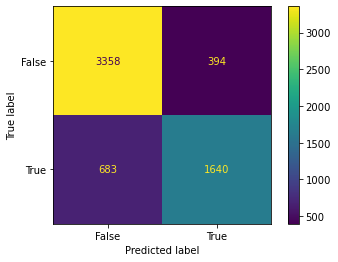

In [268]:
confusion_matrix=metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["predicted"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

Calculate the metrics  - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [269]:
print(confusion_matrix)

[[3358  394]
 [ 683 1640]]


In [270]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

#### Sensitivity

In [272]:
TP/float(TP+FN)

0.7059836418424451

#### Specificity

In [273]:
TN / float(TN+FP)

0.8949893390191898

#### False postive rate - predicting non conversion when leads have converted

In [274]:
print(FP/ float(TN+FP))

0.10501066098081023


#### Positive predictive value 

In [275]:
print (TP / float(TP+FP))

0.8062930186823992


#### Negative predictive value


In [276]:
print (TN / float(TN+ FN))

0.8309824300915615


### Plotting the ROC Curve

In [277]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [278]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

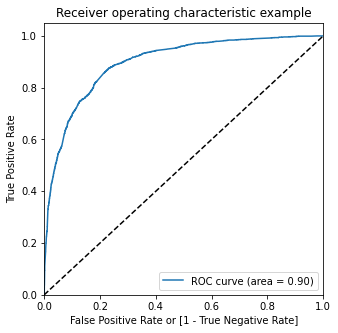

In [279]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Optimal Cut off point

In [280]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4901,1,0.435818,4901,0,1,1,1,1,1,0,0,0,0,0
6624,1,0.805603,6624,1,1,1,1,1,1,1,1,1,1,0
762,0,0.075935,762,0,1,0,0,0,0,0,0,0,0,0
2007,0,0.183691,2007,0,1,1,0,0,0,0,0,0,0,0
3441,1,0.344403,3441,0,1,1,1,1,0,0,0,0,0,0


Calculate accuracy sensitivity and specificity with all cutoff points

In [281]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382387  1.000000  0.000000
0.1   0.1  0.647243  0.972449  0.445896
0.2   0.2  0.769547  0.918640  0.677239
0.3   0.3  0.807737  0.876453  0.765192
0.4   0.4  0.815967  0.771847  0.843284
0.5   0.5  0.822716  0.705984  0.894989
0.6   0.6  0.814650  0.640551  0.922441
0.7   0.7  0.794897  0.543263  0.950693
0.8   0.8  0.772346  0.456307  0.968017
0.9   0.9  0.731852  0.319415  0.987207


Plot accuracy sensitivity and specificity for various probabilities.

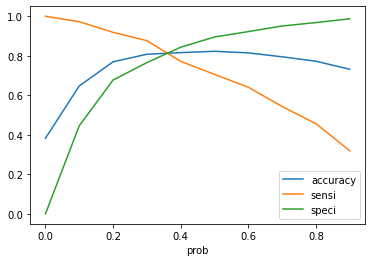

In [282]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above grap 0.37 is the optimal cutoff

Calculate the final prediction using 0.37 as the cut off

In [283]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4901,1,0.435818,4901,0,1,1,1,1,1,0,0,0,0,0,1
6624,1,0.805603,6624,1,1,1,1,1,1,1,1,1,1,0,1
762,0,0.075935,762,0,1,0,0,0,0,0,0,0,0,0,0
2007,0,0.183691,2007,0,1,1,0,0,0,0,0,0,0,0,0
3441,1,0.344403,3441,0,1,1,1,1,0,0,0,0,0,0,0


In [284]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)


,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
4901,1,0.435818,4901,0,1,1,1,1,1,0,0,0,0,0,1,44
6624,1,0.805603,6624,1,1,1,1,1,1,1,1,1,1,0,1,81
762,0,0.075935,762,0,1,0,0,0,0,0,0,0,0,0,0,8
2007,0,0.183691,2007,0,1,1,0,0,0,0,0,0,0,0,0,18
3441,1,0.344403,3441,0,1,1,1,1,0,0,0,0,0,0,0,34
6365,0,0.114182,6365,0,1,1,0,0,0,0,0,0,0,0,0,11
5243,0,0.069942,5243,0,1,0,0,0,0,0,0,0,0,0,0,7
7933,0,0.051136,7933,0,1,0,0,0,0,0,0,0,0,0,0,5
8579,0,0.094290,8579,0,1,0,0,0,0,0,0,0,0,0,0,9
9171,1,0.577801,9171,1,1,1,1,1,1,1,0,0,0,0,1,58


Get the total of final predicted conversion / non conversion counts from the actual converted rates


In [288]:

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1853
0     470
Name: final_predicted, dtype: int64

In [289]:
# check the precentage of final_predicted conversions

1853/float(1853+470)

0.7976754197158846

As per the we are able to acheive the 80%(79.76%) conversion rate with this final model

#### Final Metrics

In [291]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8153086419753086

In [294]:
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_matrix2 

array([[3100,  652],
       [ 470, 1853]])

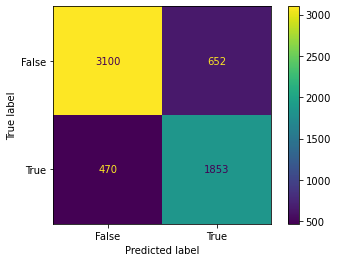

In [336]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [295]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

sensitivity of our logistic regression model


In [296]:

TP / float(TP+FN)

0.7976754197158846

specificity

In [297]:
TN / float(TN+FP)

0.826226012793177

false postive rate

In [298]:
print(FP/ float(TN+FP))

0.17377398720682302


Positive predictive value

In [299]:
TP / float(TP+FP)

0.7397205588822355

Negative predictive value

In [300]:
TN / float(TN+ FN)

0.8683473389355743

### Precision and Recall

In [301]:
from sklearn.metrics import precision_score, recall_score

In [302]:
print('******* Precission****')
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

******* Precission****


0.8062930186823992

In [303]:
print('******* Recall****')
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

******* Recall****


0.7059836418424451

#### Precision and recall tradeoff

In [304]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(4901    1
 6624    1
 762     0
 2007    0
 3441    1
        ..
 6112    1
 5526    1
 5742    1
 936     1
 7738    1
 Name: Converted, Length: 6075, dtype: int64,
 4901    0
 6624    1
 762     0
 2007    0
 3441    0
        ..
 6112    1
 5526    0
 5742    1
 936     1
 7738    1
 Name: predicted, Length: 6075, dtype: int64)

In [305]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

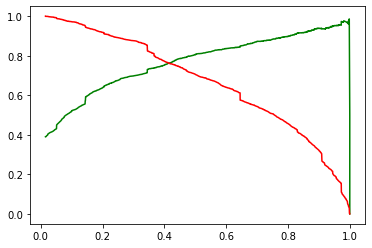

In [306]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predict on test data

In [308]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [309]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LastActivity_Email Opened,LastActivity_Had a Phone Conversation,LastActivity_Other,LastActivity_SMS Sent,CurrentOccupation_Other,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable
3423,0,-0.875184,1,0,1,0,0,0,0,1,0,1,0,0
7935,1,0.814258,0,0,0,0,0,0,0,1,0,1,0,0
3009,0,-0.153216,0,0,0,1,0,0,0,1,0,0,0,0
7432,0,1.447117,0,0,0,0,0,0,1,0,0,0,0,0
5038,0,1.499855,0,0,0,0,0,0,0,0,0,0,0,0


In [310]:
X_test_sm = sm.add_constant(X_test)

In [311]:
y_test_pred = res.predict(X_test_sm)

In [312]:
y_test_pred[:10]

3423    0.051136
7935    0.028397
3009    0.085338
7432    0.861618
5038    0.556683
7468    0.848034
944     0.312447
6666    0.988934
4328    0.191924
1420    0.016429
dtype: float64

In [313]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [314]:
y_pred_1.head()

,0
3423,0.051136
7935,0.028397
3009,0.085338
7432,0.861618
5038,0.556683


In [315]:
y_test_df = pd.DataFrame(y_test)

In [316]:
y_test_df['LeadId'] = y_test_df.index

Remove index for both dataframes to append them side by side 



In [317]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [318]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [319]:
y_pred_final.head()

,Converted,LeadId,0
0,0,3423,0.051136
1,0,7935,0.028397
2,0,3009,0.085338
3,1,7432,0.861618
4,0,5038,0.556683


Renaming the columns


In [321]:

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


In [323]:
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'],axis=1)
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,3423,0,0.051136
1,7935,0,0.028397
2,3009,0,0.085338
3,7432,1,0.861618
4,5038,0,0.556683


Calculate the final predicted based on the optimal cut off value(0.37)

In [324]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,3423,0,0.051136,0
1,7935,0,0.028397,0
2,3009,0,0.085338,0
3,7432,1,0.861618,1
4,5038,0,0.556683,1


calculate the lead score


In [325]:

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,3423,0,0.051136,0,5
1,7935,0,0.028397,0,3
2,3009,0,0.085338,0,9
3,7432,1,0.861618,1,86
4,5038,0,0.556683,1,56
5,7468,0,0.848034,1,85
6,944,1,0.312447,0,31
7,6666,1,0.988934,1,99
8,4328,0,0.191924,0,19
9,1420,0,0.016429,0,2


Get the total of final predicted conversion or non conversion counts from the actual converted rates


In [326]:

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    773
0    236
Name: final_predicted, dtype: int64

Calculate the percentage of conversion

In [327]:
773/float(773+236)

0.7661050545094152

Observations:
    final prediction of conversions have a target rate of 77% (76.6%) (Around 2 % short of the predictions made on training data set)

#### Overall metrics on test data 

In [328]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8125960061443932

In [329]:
confusion_matrix_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_matrix_test

array([[1343,  252],
       [ 236,  773]])

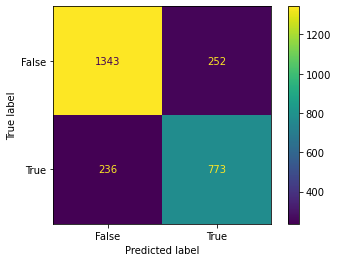

In [338]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [330]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [331]:
#sensitivity
TP / float(TP+FN)

0.7661050545094152

In [332]:
#specificity
TN / float(TN+FP)

0.8420062695924765

#### Precision and Recall metrics for the test set

In [333]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7541463414634146
recall  0.7661050545094152


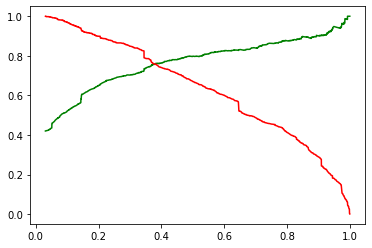

In [334]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Conclusion



-We have achieved final prediction using Sensitivity and Specificity based on optimal cut off value

- Accuracy, Sensitivity and Specificity values of test set are around 81%, 77% and 84% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.